# Flo's Bike Tour

## 0 Imports and Paths

The following packages will be needed for this notebook. Make sure you have them installed in your environment!

In [1]:
# Imports: 
import geopandas as gpd
from shapely.geometry import MultiPoint, LineString
import mplleaflet
import os
from datetime import datetime, timedelta

In addition to the imports you already know from previous jupyter notebooks in this labcourse, we also need some path information for this notebook. The following code snippet defines paths and filenames that are needed to access and write data during the remainder of this notebook. Please customize the relative paths if you store the provided data sets in other places. The os library helps you to handle file system paths in python. Further information can be found here: https://docs.python.org/2/library/os.path.html . 

In [2]:
# The os library can be used to generate absolute paths for relative paths

# In- and Output directories
IN_DIR = os.path.abspath("../homework/data") # Directory for input data
OUT_DIR = os.path.abspath("../homework/data/out") # Directory for output data
SHAPEFILES_DIR = "\\shapefiles" # Sub-directory for shapefiles

# Input Filenames
FLOS_TOUR_FILENAME = "flos_tour.geojson" # Filename of Flos tour data
COUNTRY_BOUNDARIES_FILENAME = "countries.shp" # Filename of the world country data

# Output Filenames
MAP_FILENAME = "flos_bike_map.html" # Ouput File

## 1 Introduction

In this notebook, we will have a look at a bicycle tour Flo - one of the research associates - went on this year. When he went on his bike tour, he took a GPS tracker with him and recorded his track for this labcourse. The corresponding geojson file contains the GPS points as geometry, timestamps and elevation data. 

For the homework, you will be asked to use this raw GPS data to extract information from it and analyze Flo's bike tour. The following pieces of information shall be retrieved from the data set: 

    1.1 The countries Flo visited (Section 3.1)
    1.2 The country every GPS point belongs to (Section 3.1)
    1.3 The number of GPS points in the traversed countries (Section 3.1)
    
    2.1 The total duration of Flo's bike tour (Section 3.2)
    
    3.1 The time Flo spent in each country (Section 3.3)
    3.2 The reason why the sum of 3.1 does not equal the total duration from 2.1 (Section 3.3)
    3.3 The time difference between the sum of 3.2 and the total duration from 2.1 (Section 3.3)

In addition to the bike tour data set you are also provided a countries shapefile, which contains all the countries of the world.

Although you are perfectly able to solve these tasks with your new GeoPandas and shapely knowledge, this notebook will guide you through the process to make life a little easier for you. Nevertheless, you can always solve the tasks your own way, as long as you stick to the constraints, assumptions and targets given in this notebook. 

Good luck and have fun with the exercise!

## 2 Load Input Data

Ofentimes, data is not created by oneself, but imported from external data sources. Geopandas can read commmon geometric data formats, like geojson. When a file is read into GeoPandas, a GeoDataFrame is returned. 
To read in files GeoPandas offers the following method: 

    my_df = gpd.read_file("<filepath>", driver="<drivername>")

When reading in files with GeoPandas, a driver, fitting the data format to be read in, should be specified. The following drivers are offered by GeoPandas for file input and output: 

'ESRI Shapefile',
'ARCGEN',
'PCIDSK',
'SUA', 
'DGN',
'SEGY',
'MapInfo File',
'GeoJSON',
'PDS', 
'FileGDB',
'GPX',
'DXF',
'GMT',
'Idrisi', 
'GPKG',
'OpenFileGDB',
'BNA',
'AeronavFAA', 
'GPSTrackMaker'

##### ENABLING - TASK (To be finished during the labcourse, not at home!)
Create two GeoDataFrames by reading the bike tour data set and the countries data set. Name these GeoDataFrames 'flos_tour' and 'countries'! Also set the 'ADMIN'-column of the countries GeoDataFrame to be the index (hint: my_df.index = my_df.<my_column>).

In [3]:
# Read in the GeoDataFrames and set the index columns correctly:
flos_tour = gpd.read_file("./data/flos_tour.geojson", driver="Flo")
countries = gpd.read_file("./data/shapefiles/countries.shp")
countries.index = countries.ADMIN


You can now have a look at the datasets, to get an idea of their contents:

In [4]:
flos_tour

,track_fid,track_seg_id,track_seg_point_id,ele,time,geometry
0,0,0,0,612.0,2019-06-08T01:09:03,POINT (11.55043 48.11004)
1,0,0,1,590.0,2019-06-08T06:45:10,POINT (11.55116 48.11036)
2,0,0,2,656.0,2019-06-08T09:31:53,POINT (11.07339 47.94067)
3,0,0,3,721.0,2019-06-08T12:19:21,POINT (10.62392 47.88083)
4,0,0,4,769.0,2019-06-08T15:06:15,POINT (10.36229 47.73559)
...,...,...,...,...,...,...
431,0,0,431,224.0,2019-07-09T15:39:49,POINT (-4.69347 36.64786)
432,0,0,432,158.0,2019-07-09T16:39:54,POINT (-4.55080 36.66127)
433,0,0,433,160.0,2019-07-09T17:40:06,POINT (-4.53723 36.66122)
434,0,0,434,153.0,2019-07-09T18:40:17,POINT (-4.53761 36.66102)


In [5]:
countries

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
ADMIN,,,,,,,,,,,,,,,,,,,,,
Zimbabwe,Admin-0 country,1,3,Zimbabwe,ZWE,0,2,Sovereign country,Zimbabwe,ZWE,...,짐바브웨,Zimbabwe,Zimbabwe,Zimbábue,Зимбабве,Zimbabwe,Zimbabve,Zimbabwe,辛巴威,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
Zambia,Admin-0 country,1,3,Zambia,ZMB,0,2,Sovereign country,Zambia,ZMB,...,잠비아,Zambia,Zambia,Zâmbia,Замбия,Zambia,Zambiya,Zambia,赞比亚,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."
Yemen,Admin-0 country,1,3,Yemen,YEM,0,2,Sovereign country,Yemen,YEM,...,예멘,Jemen,Jemen,Iémen,Йемен,Jemen,Yemen,Yemen,也门,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16..."
Vietnam,Admin-0 country,3,2,Vietnam,VNM,0,2,Sovereign country,Vietnam,VNM,...,베트남,Vietnam,Wietnam,Vietname,Вьетнам,Vietnam,Vietnam,Việt Nam,越南,"MULTIPOLYGON (((104.06396 10.39082, 104.08301 ..."
Venezuela,Admin-0 country,5,3,Venezuela,VEN,0,2,Sovereign country,Venezuela,VEN,...,베네수엘라,Venezuela,Wenezuela,Venezuela,Венесуэла,Venezuela,Venezuela,Venezuela,委內瑞拉,"MULTIPOLYGON (((-60.82119 9.13838, -60.94141 9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Albania,Admin-0 country,1,6,Albania,ALB,0,2,Sovereign country,Albania,ALB,...,알바니아,Albanië,Albania,Albânia,Албания,Albanien,Arnavutluk,Albania,阿尔巴尼亚,"POLYGON ((19.34238 41.86909, 19.34551 41.91885..."
Afghanistan,Admin-0 country,1,3,Afghanistan,AFG,0,2,Sovereign country,Afghanistan,AFG,...,아프가니스탄,Afghanistan,Afganistan,Afeganistão,Афганистан,Afghanistan,Afganistan,Afghanistan,阿富汗,"POLYGON ((66.52227 37.34849, 66.82773 37.37129..."
Siachen Glacier,Admin-0 country,1,5,Kashmir,KAS,0,2,Indeterminate,Siachen Glacier,KAS,...,시아첸 빙하,Siachengletsjer,Lodowiec Siachen,Glaciar de Siachen,Сиачен,Siachen Glaciären,Siachen Buzulu,Sông băng Siachen,锡亚琴冰川,"POLYGON ((77.04863 35.10991, 77.00449 35.19634..."


## 3 Analyzing the Data Set

After the data has been loaded into GeoDataFrames it can be analyzed to answer the core questions of this homework. Let's start with the countries Flo traversed during his bike tour (Section 3.1), before we determine the total duration of his trip (Section 3.2) and the duration per country (Section 3.3).

### 3.1 Traversed Countries

##### TASK 1.1

Select the countries Flo visited/traversed during his bike tour (i.e. every country he was in) from the countries GeoDataFrame and print their names. Save the selected countries in a GeoDataFrame called 'traversed_countries'. The following hints may help you to solve this task:

Hints:

    - Use a shapely operation to check whether the GPS points are in a country
    - Use conditional selection to select only the countries that contain GPS points of Flo's tour
    - A MultiPoint object containing all GPS points can help (but is not required)
    
The following resources can help you if you get stuck: 

Resources:
* https://shapely.readthedocs.io/en/stable/manual.html
* Shapely basics notebook
* GeoPandas basics notebook

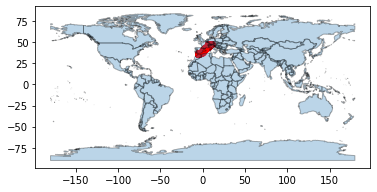

In [6]:
ax = flos_tour.plot(alpha=0.3, color='red')
countries.plot(ax = ax, alpha=0.3, edgecolor='k')

In [7]:
# ------old method------

# flos_tour["traversed"] = None # boolean values of flos_tour w.r.t a centain country
# floTraversedCountries = [] # list of whether flo has been to the countries
# flos_tour_flag = False

# for country in countries.geometry:
#     flos_tour["traversed"] = flos_tour.within(country)
#     for flos_tour_count in flos_tour["traversed"]:
#         if flos_tour_count == True:
#             floTraversedCountries.append(True)
#             flos_tour_flag = True
#             break
#     if not flos_tour_flag:
#         floTraversedCountries.append(False)
#     else:
#         flos_tour_flag = False
        
# # print(floTraversedCountries)

# traversed_countries = []
# for i in range(len(countries)):
#     if floTraversedCountries[i]:
#         traversed_countries.append(countries.ADMIN[i])
        
# print("I have traveled to these countries: " + str(traversed_countries))

I have traveled to these countries: ['Switzerland', 'Spain', 'Morocco', 'Italy', 'Germany', 'France']


In [116]:
# Determine the traversed countries and save them in a variable called "traversed_countries". Print their names!

m = MultiPoint(flos_tour.geometry)

traversed_countries = countries.loc[countries.geometry.intersects(m)]

print(traversed_countries.index)

Index(['Switzerland', 'Spain', 'Morocco', 'Italy', 'Germany', 'France'], dtype='object', name='ADMIN')


##### TASK 1.2/1.3 Part I

Add a column 'in_country' to 'flos_tour' and initialize all the values in the column to None. The 'in_country' column shall contain the country names for each of the GPS Points.

Hints:
    - Loop over all traversed countries (see resources)
    - Use conditional selection to fill the 'in_country'-column with the corresponding country name
    
Resources:
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html

In [118]:
# Add an in_country column to "flos_tour" and fill it with the names of the countries that correspond to the GPS point

flos_tour = flos_tour.assign(in_country = None)

for country_label, country in countries.iterrows(): # iterrows output: tuple of index and series/data
    for flos_tour_label, flos_point in flos_tour.iterrows():
        if flos_point.geometry.within(country.geometry):
            flos_tour.in_country[flos_tour_label] = country_label

print(flos_tour)

/home/ge54seq/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


     track_fid  track_seg_id  track_seg_point_id    ele                 time  \
0            0             0                   0  612.0  2019-06-08T01:09:03   
1            0             0                   1  590.0  2019-06-08T06:45:10   
2            0             0                   2  656.0  2019-06-08T09:31:53   
3            0             0                   3  721.0  2019-06-08T12:19:21   
4            0             0                   4  769.0  2019-06-08T15:06:15   
..         ...           ...                 ...    ...                  ...   
431          0             0                 431  224.0  2019-07-09T15:39:49   
432          0             0                 432  158.0  2019-07-09T16:39:54   
433          0             0                 433  160.0  2019-07-09T17:40:06   
434          0             0                 434  153.0  2019-07-09T18:40:17   
435          0             0                 435  133.0  2019-07-09T19:40:26   

                      geometry in_count

The 'value_counts()' function can be used to see the unique values in a pandas Series and the number of times, this value is present in the Series. Let's use this function to assess the content of our 'in_country'-column. To put the numbers into perspective, we will also print the total number of GPS points in the data set.

In [119]:
print(flos_tour.in_country.value_counts())
print("\nSum of points that have been associated with a country: "+ str(sum(flos_tour.in_country.value_counts())))
print("\nTotal number of points (Flo's Tour): "+ str(len(flos_tour)))

France         157
Spain          116
Switzerland     33
Germany         24
Morocco         22
Italy            7
Name: in_country, dtype: int64

Sum of points that have been associated with a country: 359

Total number of points (Flo's Tour): 436


As you can see, there are points that have not been associated with any of the traversed countries. These 'missing_points' shall now be identified and the reason why they have not been associated with any country has to be found!

##### TASK 1.2/1.3 Part II

Select the rows from 'flos_tour', for which the 'in_country'-column has not been set! These are the missing points, store them in a variable called 'missing_points'!
    
Resources:
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html

In [120]:
# Select the points that have no country name assigned. Store the result in a variable called "missing_points"

flos_tour_isna = flos_tour.in_country.isna()

missing_points = flos_tour.loc[flos_tour_isna]

print(missing_points)

     track_fid  track_seg_id  track_seg_point_id    ele                 time  \
194          0             0                 194   56.0  2019-06-22T09:26:11   
195          0             0                 195   63.0  2019-06-22T10:26:29   
196          0             0                 196   58.0  2019-06-22T11:26:41   
197          0             0                 197   55.0  2019-06-22T15:27:40   
206          0             0                 206   57.0  2019-06-23T11:41:01   
..         ...           ...                 ...    ...                  ...   
386          0             0                 386   80.0  2019-07-06T11:03:12   
391          0             0                 391  126.0  2019-07-06T17:08:33   
400          0             0                 400   73.0  2019-07-07T11:07:02   
411          0             0                 411   39.0  2019-07-08T07:21:30   
412          0             0                 412   48.0  2019-07-08T08:21:33   

                      geometry in_count

Now that we have isolated the 'missing_points', we want to have a look at these points to find out, why they have not been associated with any country. To do that, we will use a python library called mplleaflet.
Mplleaflet enables us to plot geometry on basemaps, as you know them from all online map services like google maps. It generates a so called "slippy map" (https://wiki.openstreetmap.org/wiki/Slippy_Map) that you can pan and zoom  with your mouse. 

Please see https://github.com/jwass/mplleaflet and the following code snippet for further information!

In [121]:
# mplleaflet is a handy package that makes it easy to plot GeoDataFrames on top of basemaps.
# To do so, the GeoDataFrame has to be plotted using the already known function plot().
# The generated ax object is then passed to mplleaflet.show(fig=ax.figure, path="<out_path>", **kwargs).
# A map is generated and stored under the specified path.
# The resulting .html map can (and will) be opened in your browser. It is pan- and zoomable
# and contains the data stored in the GeoDataFrame
# Instead of using mplleaflet.show(..) you can use mplleaflet.display(fig=ax.figure, **kwargs) to display embed the map
# in a jupyter notebook without saving it.

ax = missing_points.plot()
ax.figure.set_size_inches(10,10)
traversed_countries.plot(ax=ax, alpha=0.3,edgecolor='k')

mplleaflet.display(fig=ax.figure)
# mplleaflet.display(fig=ax.figure) # Use this if no map was opened in your browser!

/home/ge54seq/.local/lib/python3.6/site-packages/IPython/core/display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


##### TASK 1.2/1.3 Part III

Have a look at the map and use panning and zooming to find out why the missing points were not associated with a country! Think of a good way to assign the points to a country. 

Hint: 
    - The blue areas are the contries as stored in your countries GeoDataFrame
    - The blue dots are the missing GPS points 
    - Zoom closely    

From a visual inspection we now know why some of the points have not been associated with any of the traversed countries. Obviously, Flo never went to a place that does not belong to any real country with his bike. Therefore, you have to associate the missing points with the countries Flo was really in.

##### TASK 1.2/1.3 Part IV

Fill in the missing values in the 'in_country'-column of 'flos_tour' with the countries that are closest to the respective GPS point.

Hint: 
    - Loop over the missing points
    - Use a shapely function to obtain the distance between a missing point and the traversed countries
    - min(Series), gives you the minimal value in a Series

In [129]:
# Fill the missing values of the "in_country"-column with 
# the names of the countries that are closest to the respective GPS point!

temp_traversed_country = None
temp_min_distance = 100
temp_distance = 0
for missing_point_label, missing_point in missing_points.iterrows():
    for traversed_country_label, traversed_country in traversed_countries.iterrows():
#         print("distance between {} and {}:".format(missing_point_label, traversed_country_label))
        temp_distance = missing_point.geometry.distance(traversed_country.geometry)
        if temp_distance < temp_min_distance:
            temp_traversed_country = traversed_country_label
            temp_min_distance = temp_distance
    flos_tour.in_country[missing_point_label] = temp_traversed_country

/home/ge54seq/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


The following code snippet helps you to check your result and answer TASK 1.3: How many GPS points do we have per traversed country?

In [130]:
print(flos_tour.in_country.value_counts())
print("\nSum of points that have been associated with a country: "+ str(sum(flos_tour.in_country.value_counts())))
print("\nTotal number of points (Flo's Tour): "+ str(len(flos_tour)))

Spain          177
France         173
Switzerland     33
Germany         24
Morocco         22
Italy            7
Name: in_country, dtype: int64

Sum of points that have been associated with a country: 436

Total number of points (Flo's Tour): 436


### 3.2 Total duration

Sections 3.2 and 3.3 deal with the question of how long Flo spent cycling (Section 3.2) and how long he spent in each country he visited (Section 3.3). To answer this question, we need to convert the timestamps in 'flos_tour' from a string format to a python datetime format. This has already been done for you in the following code box. Take a look at how the pandas 'apply(..)' function (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html) has been used to convert each entry of the 'time'-column. 

Note: We use the python datetime library in this homework (https://docs.python.org/3/library/datetime.html)

In [131]:
# First let's parse the time strings
# Documentation can be found here:
# https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior
flos_tour["time"] = flos_tour["time"].apply(func = datetime.strptime, args= ["%Y-%m-%dT%H:%M:%S"])

##### TASK 2.1

Calculate the total duration of 'flos_tour' as a timedelta (https://docs.python.org/3.7/library/datetime.html#timedelta-objects). Store it in a variable called 'total_duration'.

Hint: 
    - A timedelta results from a subtraction of two datetime objects
    - After conversion, flos_tour.time contains only datetime objects

31 days 18:31:23
2019-07-09 19:40:26


In [149]:
# Calculate total duration of flos tour and store it in a variable called "total_duration"
total_duration = flos_tour.time.iloc[-1]-flos_tour.time.iloc[0]



Let's check your result:

In [150]:
print("The total duration of Flo's tour was {}".format(str(total_duration)))

The total duration of Flo's tour was 31 days 18:31:23


### 3.3 Duration per country

##### TASK 3.1

Add a 'duration' column to the 'traversed_countries' GeoDataFrame and initialize it to None. For each country, calculate the duration Flo spent in that country, respecting the assumptions below.

Assumptions:

    - A leg is a set of consecutive GPS points in a country
    - Multiple legs can belong to one country 
      (e.g. Flo entered country c, left, spent time somewhere else, entered c again, left -> 2 legs in c)
    - The duration of a leg is determined by the timedelta between the first timestamp of the leg and the last
      timestamp of the leg.
    - The duration spent in a country is determined by the sum of durations of every leg belonging to that country

Hints: 
    - Take a close look at the pre-defined helper functions below, they help you through this exercise.

In [155]:
## Helper functions for Task 3.1: You do not have to use them, but it is easier if you do!

# Retrieve a Series of indices that belong to points inside a country
def indices_in_country(country_index):
    return flos_tour.index[flos_tour.in_country==country_index]

# Generate a list of lists that contain consecutive numbers (i.e. legs) that appear in the input list of numbers (nums)
# Example: genlegs([1,2,3,8,9,17]) -> [[1, 2, 3], [8, 9], [17]]
def genlegs(nums):
    groups = []
    cur_group = [nums[0]]

    for i, num in enumerate(nums[1:]):
        if num==cur_group[-1]+1:
            cur_group.append(num)
        else:
            groups.append(cur_group)
            cur_group = [num]

    groups.append(cur_group)

    return groups

# From a list of legs, delete all numbers that are not the start or end of a leg.
# If a list consits of one number only, copy it!
# Example: legs_start_end_ind([[1, 2, 3], [8, 9], [17]]) -> [[1, 3], [8, 9], [17, 17]]
def legs_start_end_ind(leg_list):
    return [[leg[0], leg[-1]] for leg in leg_list]

# From a list of start and end indices, generate a list of start and end timestamps for each leg. Calculate
# the timedelta for each leg and return the sum of timedeltas
# A Series of timestamps with an index column corresponding to the indices in the start and end list hast to be
# supplied as well.
# Example: time_in_country([[1, 3], [8, 9], [17, 17]],flos_tour.time) -> Timedelta('0 days 15:45:23')
def time_in_country(start_end, times):
    durations = [times.iloc[idx[1]]-times.iloc[idx[0]] for idx in start_end]
    time_in_country = sum(durations, timedelta(0))
    return time_in_country

In [156]:
# Add and fill a "duration"-column to the "traversed_countries" GeoDataFrame!

traversed_countries = traversed_countries.assign(duration = None)
print(traversed_countries.duration)

ADMIN
Switzerland    None
Spain          None
Morocco        None
Italy          None
Germany        None
France         None
Name: duration, dtype: object


Let's have a look at the sum of durations inside the countries and compare it to the total duration of Flo's tour we computed before:

In [157]:
total_duration_sum_legs = sum(traversed_countries.duration, timedelta(0))
print("Total duration sum of country durations: {}\n".format(str(total_duration_sum_legs)))
print("Total duration Flo's tour: {}\n".format(str(total_duration)))

TypeError: unsupported operand type(s) for +: 'datetime.timedelta' and 'NoneType'

The two calculated durations are unequal! 

##### TASK 3.2

Why is the sum of the 'traversed_countries.duration' column unequal to the 'total_duration'? (no programming needed)

##### TASK 3.3

Calculate the missing time as a timedelta using the knowledge from TASK 3.2 and save it in a variable called 'missing_duration'. 
Note: Calculating the 'missing_duration' as the difference between the 'total_duration' and the 'total_duration_sum_legs' will not earn you any marks! You have to calculate it using reasoning from 3.2 and the original data. 

Hints: 
    - We have considered all the time spend in legs inside the countries -> What is missing?

In [19]:


# Task 3.3: Calculate the missing duration and save it in a variable called "missing_duration"



The following code box helps you to test and verify your results!

In [20]:
fixed_duration = total_duration_sum_legs + missing_duration

print("Total duration: {}\n".format(str(total_duration)))
print("Total duration sum of country durations: {}\n".format(str(total_duration_sum_legs)))
print("Missing duration: {}\n".format(str(missing_duration)))
print("Fixed duration: {}\n".format(str(fixed_duration)))
print("Time per country:\n {}\n".format(traversed_countries.duration))

Total duration: 31 days 18:31:23

Total duration sum of country durations: 31 days 04:24:36

Missing duration: 0 days 14:06:47

Fixed duration: 31 days 18:31:23

Time per country:
 ADMIN
Switzerland     2 days 01:36:26
Spain          12 days 14:56:03
Morocco         1 days 19:17:50
Italy           0 days 06:01:10
Germany         2 days 06:39:36
France         12 days 03:53:31
Name: duration, dtype: object



Last but not least, let's visualize the results of this notebook!

In [21]:
ax = flos_tour.plot()
traversed_countries["duration_in_hours"] = traversed_countries.duration.apply(func=lambda x: x.total_seconds() / 3600.0)
traversed_countries.plot(ax=ax, alpha=0.3,edgecolor='k', column='duration_in_hours', cmap='Reds')
figure = ax.figure
figure.set_size_inches(10,10)
  
mplleaflet.display(fig=figure)